In [195]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches # needed for waffle Charts
import plotly.graph_objects as go
import plotly.express as px
mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


In [111]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


[]

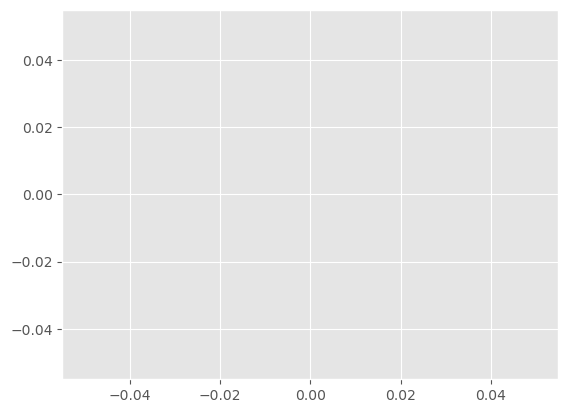

In [112]:
plt.plot() 

In [113]:
df.isnull().sum()
#Checking missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
def search_string(s, search):
    return search in str(s).lower()

# Search for the string 'Unknown', 'Nan' and 'None' in all columns
mask = df.applymap(lambda x: search_string(x, 'Unknown'))

# Filter the DataFrame based on the mask
filtered_df = df.loc[mask.any(axis=1)]
filtered_df

#No missing values

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


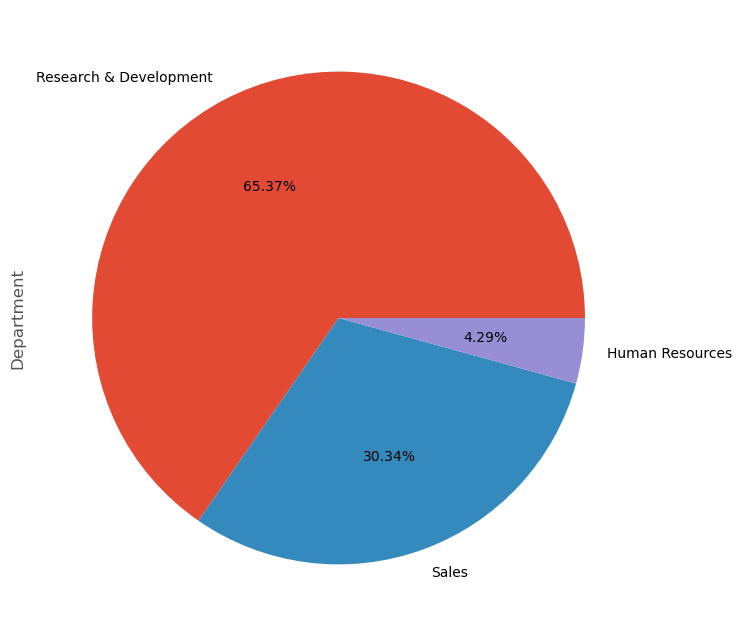

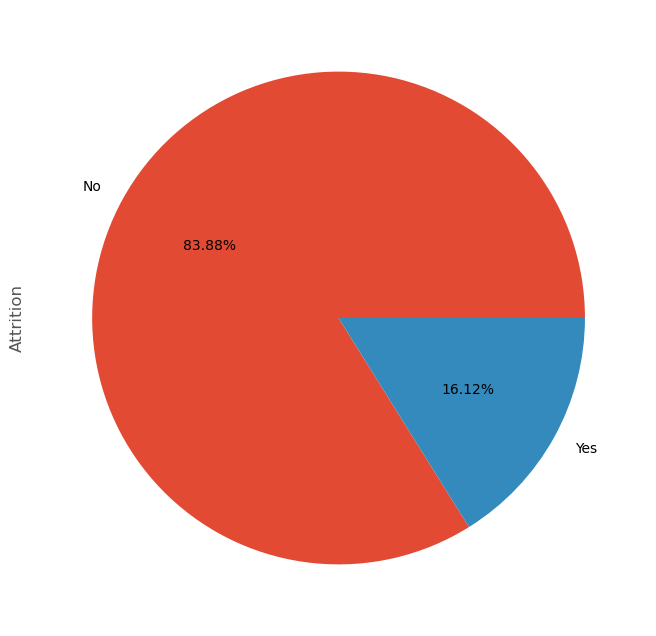

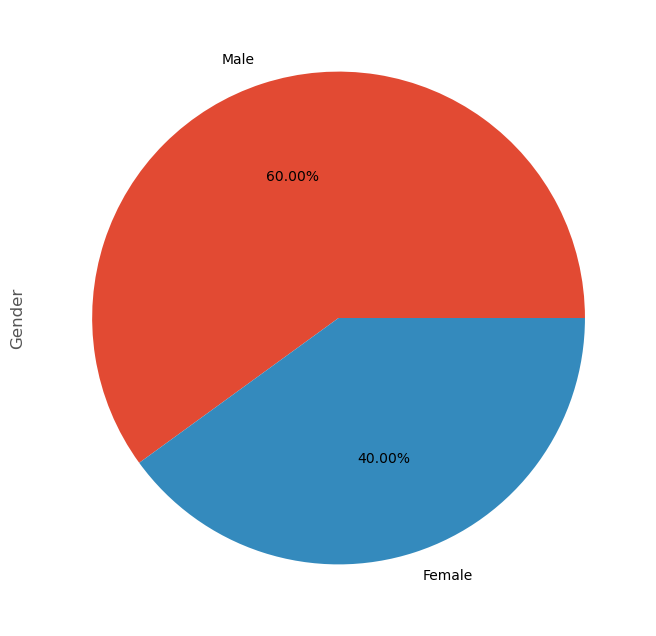

In [114]:
fig,ax1 = plt.subplots(figsize=(8,8))
fig,ax2 = plt.subplots(figsize=(8,8))
fig,ax3 = plt.subplots(figsize=(8,8))

df['Department'].value_counts().plot(kind='pie',
                                           autopct='%.2f%%', #&d%%
                                           ax=ax1)
df['Attrition'].value_counts().plot(kind='pie',
                                           autopct='%.2f%%', #&d%%
                                           ax=ax2)
df['Gender'].value_counts().plot(kind='pie',
                                           autopct='%.2f%%', #&d%%
                                           ax=ax3)
plt.show()
#Dari perusashaan ini, presentase terbesar dari departmentnya adalah department Research and Development, lalu diikuti dengan Sales dan Human Resources
#Jumlah pegawai pria lebih banyak dari perempuan
#jumlah pegawai yang menetap lebih banyak dari yang resign

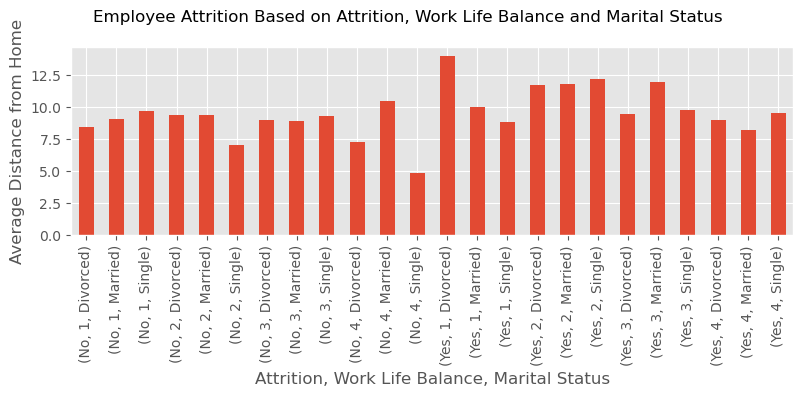

In [115]:
fig, basedonDistance = plt.subplots(ncols=1,figsize=(8,4))
fig.suptitle("Employee Attrition Based on Attrition, Work Life Balance and Marital Status")
fig.subplots_adjust(top=0.9)
basedonDistance = df.groupby(['Attrition','WorkLifeBalance','MaritalStatus'])['DistanceFromHome'].mean().plot(kind='bar');
basedonDistance.set_xlabel('Attrition, Work Life Balance, Marital Status')
basedonDistance.set_ylabel('Average Distance from Home')
plt.tight_layout()

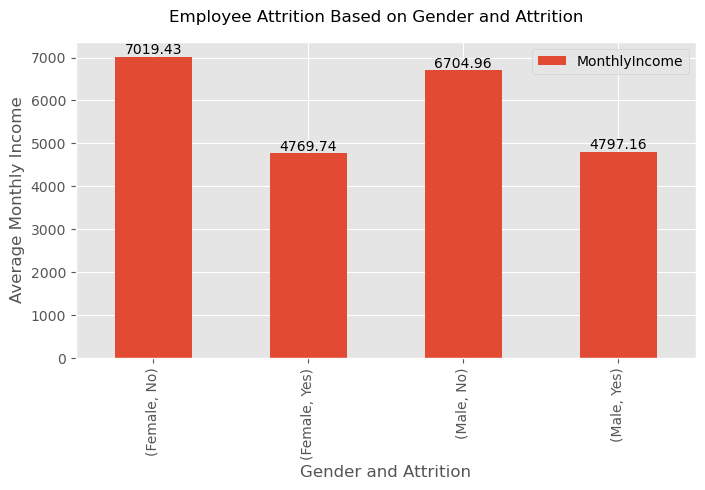

In [116]:
fig, splot = plt.subplots(ncols=1,figsize=(8,4))
fig.suptitle("Employee Attrition Based on Gender and Attrition")
fig.subplots_adjust(top=0.9)
splot=df.groupby(['Gender','Attrition'])['MonthlyIncome'].mean().plot(kind='bar');
splot.set_xlabel('Gender and Attrition')
splot.set_ylabel('Average Monthly Income')
for i in splot.containers:
    splot.bar_label(i)
plt.legend(bbox_to_anchor=(1,1))
#Statistik attrition berdasarkan rata-rata monthly income dari jenis kelamin karyawan perusahaan
#dari graph dibawah, bisa dilihat kalau karyawan yang memiliki gaji/income yang tinggi akan memiliih untuk menetap

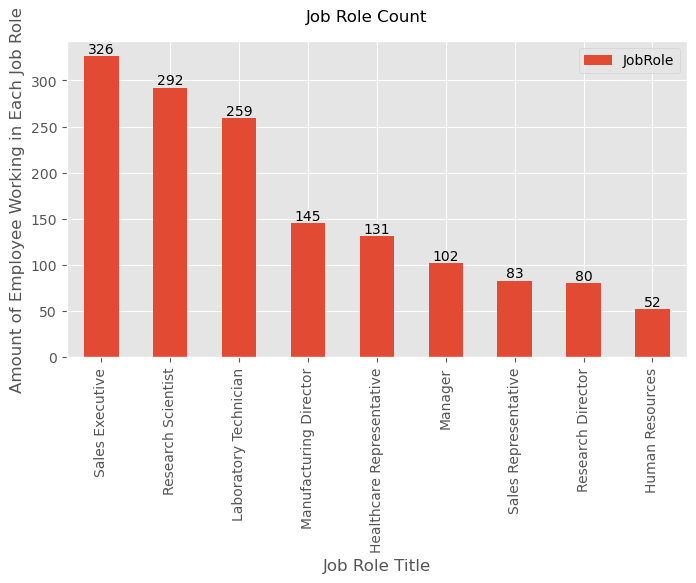

In [212]:
fig, jobRoleCount = plt.subplots(ncols=1,figsize=(8,4))
jobRoleCount=df['JobRole'].value_counts()
jrc = jobRoleCount.plot(kind='bar')
fig.suptitle("Job Role Count")
jrc.set_xlabel('Job Role Title')
jrc.set_ylabel('Amount of Employee Working in Each Job Role')
fig.subplots_adjust(top=0.9)
for i in jrc.containers:
    jrc.bar_label(i)
plt.legend(bbox_to_anchor=(1,1))
#Jumlah employee di tiap job role didalam perusahaan

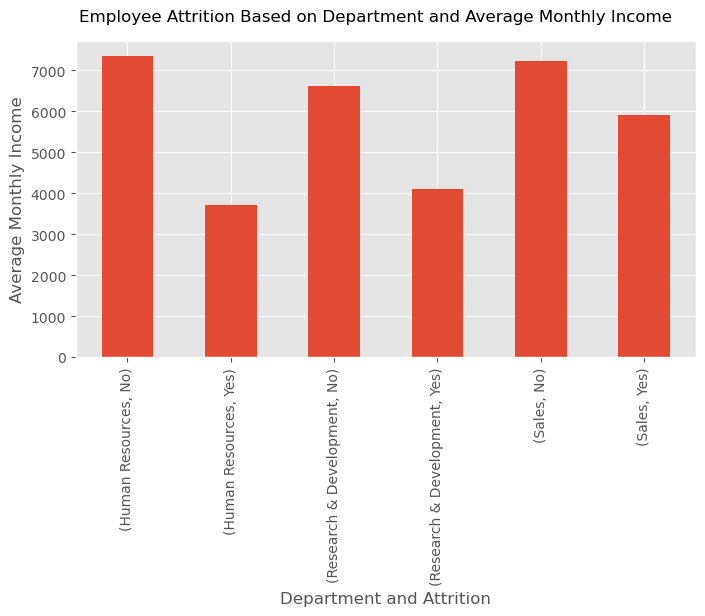

In [206]:
fig, splot = plt.subplots(ncols=1,figsize=(8,4))
fig.suptitle("Employee Attrition Based on Department and Average Monthly Income")

attritionCount = df['Attrition'].value_counts()
splot=df.groupby(['Department','Attrition'])['MonthlyIncome'].mean().plot(kind='bar')
splot.set_xlabel('Department and Attrition')
splot.set_ylabel('Average Monthly Income')
fig.subplots_adjust(top=0.9)
#employee dengan rata-rata income yang rendah tiap departemen lebih memilih untuk keluar dari perusahaan

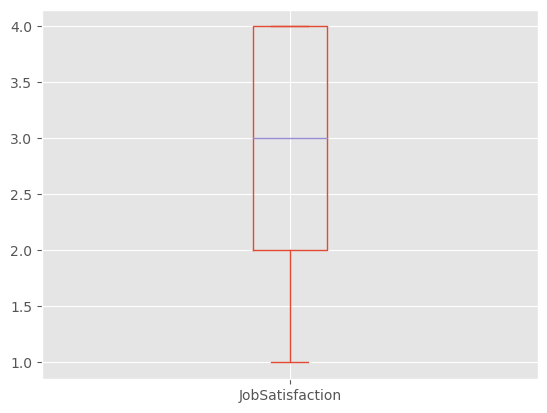

In [209]:
boxPlot = df['JobSatisfaction'].plot(kind='box')
#Job satisfaction menunjukkan bahwa employee cenderung puas dengan pekerjaannya

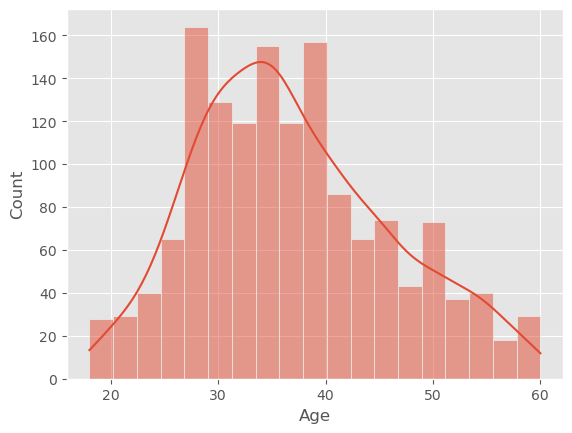

In [120]:
sns.histplot(x=df['Age'], kde=True);
#Plot histogram untuk menunjukkan umur dari pegawai didalam perusahaan

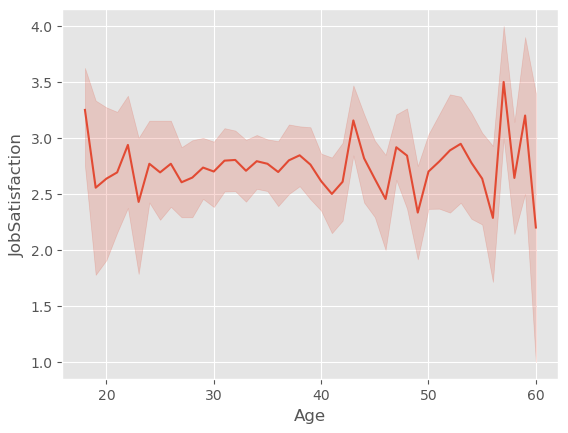

In [215]:
sns.lineplot(data=df, x=df['Age'],y=df['JobSatisfaction']);

In [122]:
df[['Age','Gender','MonthlyIncome','MaritalStatus','JobSatisfaction','Attrition']]

,Age,Gender,MonthlyIncome,MaritalStatus,JobSatisfaction,Attrition
0,41,Female,5993,Single,4,Yes
1,49,Male,5130,Married,2,No
2,37,Male,2090,Single,3,Yes
3,33,Female,2909,Married,3,No
4,27,Male,3468,Married,2,No
...,...,...,...,...,...,...
1465,36,Male,2571,Married,4,No
1466,39,Male,9991,Married,1,No
1467,27,Male,6142,Married,2,No
1468,49,Male,5390,Married,2,No


In [ ]:
#Practice Data Analysis Menggunakan Plotly

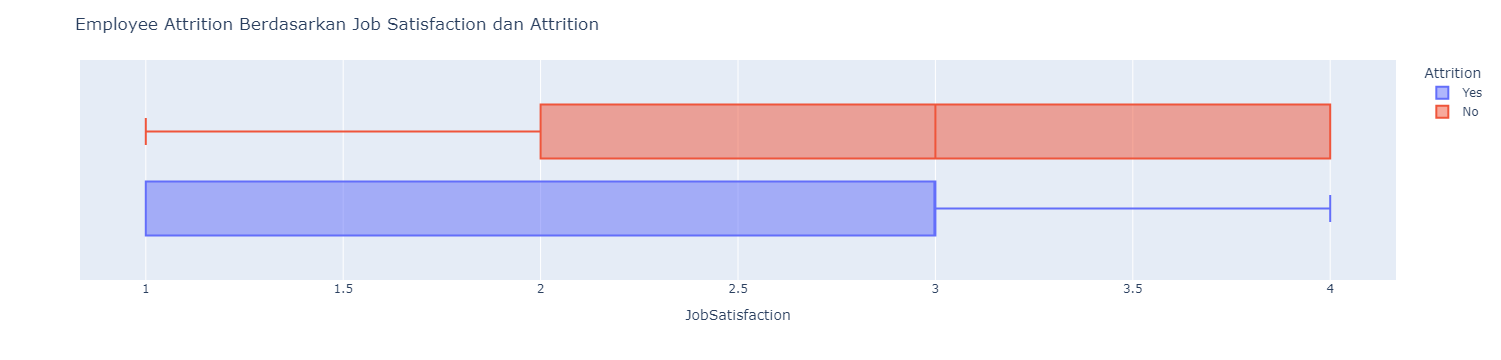

In [198]:
fig= px.box(df, x=df['JobSatisfaction'], color=df['Attrition'])
fig.update_layout(title='Employee Attrition Berdasarkan Job Satisfaction dan Attrition')
fig.show()
#Berdasarkan Attrition dan Job Satisfaction, bisa dilihat bahwa employee banyak yang merasa cukup puas dengan pekerjaannya (Median 3) dan nukan pengaruh terbesar untuk Attrition

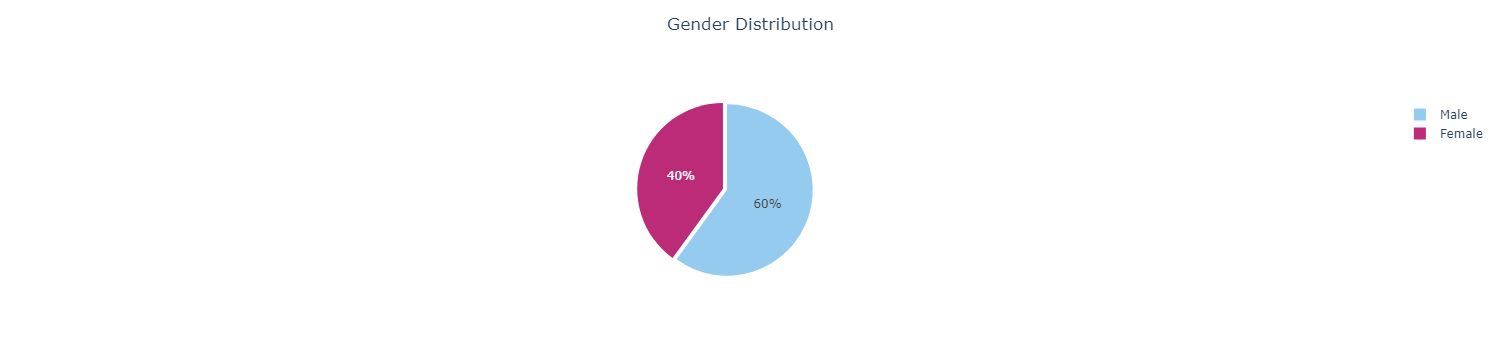

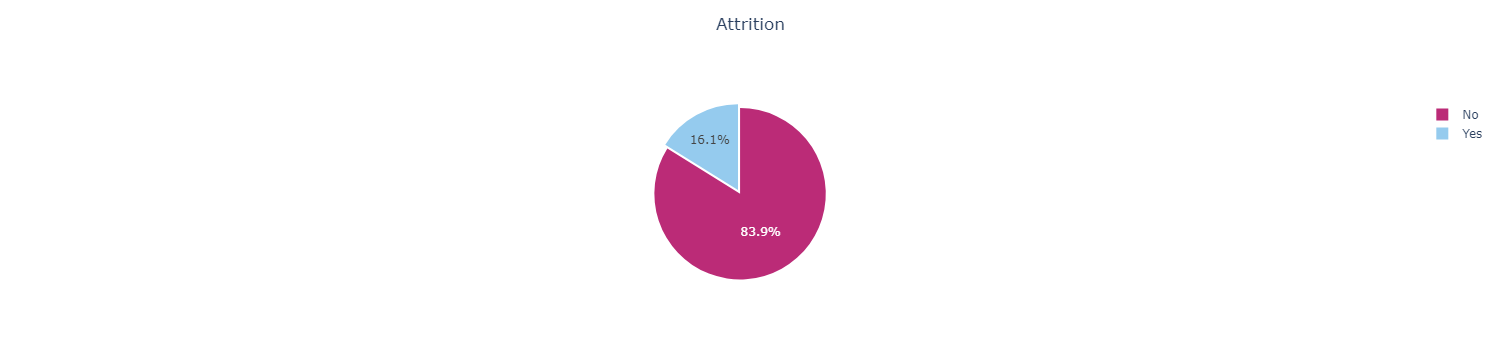

In [194]:
def val_counts(df, var):
    counts = df[var].value_counts().sort_index()
    labels = counts.index
    sizes = counts.values
    return labels, sizes
#fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

labels = val_counts(df, 'Gender')[0]
values= val_counts(df, 'Gender')[1]
labels2 = val_counts(df, 'Attrition')[0]
values2= val_counts(df, 'Attrition')[1]
colors = ['#bb2b77','#95cbee']

explode = (0.05, 0) # Explode the first slice (male) for emphasis

## Create a Pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values,
                             pull=explode, marker=dict(colors=colors))])
fig2 = go.Figure(data=[go.Pie(labels=labels2, values=values2,
                             pull=explode, marker=dict(colors=colors))])
# Adjusting the position of the horizontal legend
fig.update_layout(
    title=dict(text='Gender Distribution', x=0.5, y=0.95)
)
fig2.update_layout(
    title=dict(text='Attrition', x=0.5, y=0.95)
)
fig.show()
fig2.show()

In [200]:
Pie chart diatas menunjukkan pie chart untuk gender dan attrition didalam perusahaan, bisda dilihat bahwa didalam perusahaan gender pria lebih dominan terhadap perempuan 
dan jumlah attrition No lebih sedikit dibandingkan Yes


SyntaxError: invalid syntax (1611494730.py, line 1)

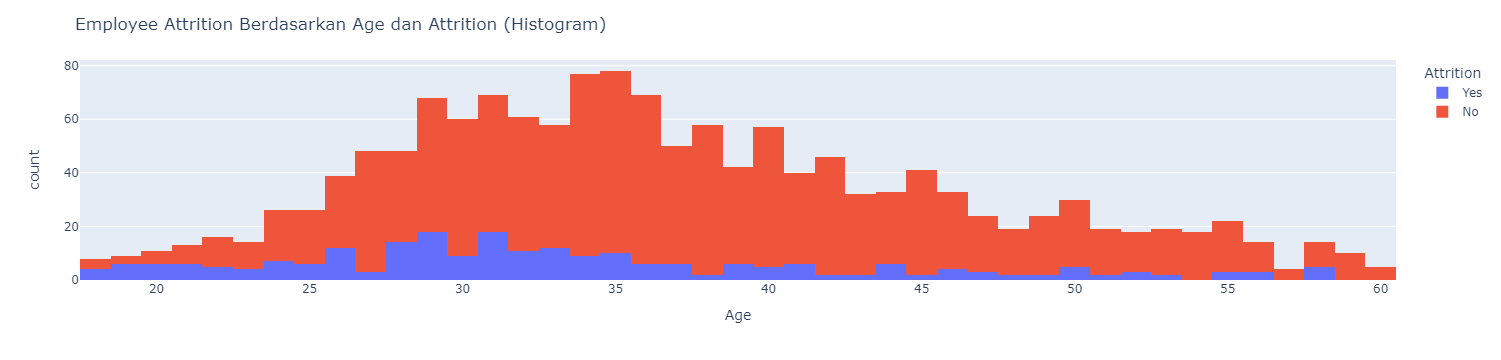

In [201]:
fig = px.histogram(df, x=df['Age'],color=df['Attrition'],hover_data=df.columns)
fig.update_layout(title='Employee Attrition Berdasarkan Age dan Attrition (Histogram)')

fig.show()
#histogram yang menunjukkan employee ttrition berdasarkan age, disini kadar attrition tertinggi terdapat pada employee berumur 29 dan 31 (count 18)

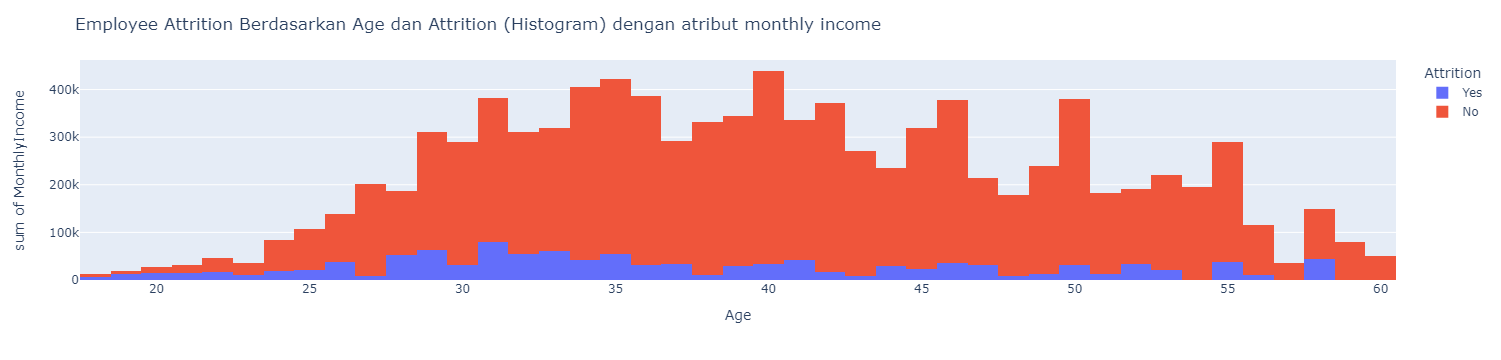

In [204]:
fig = px.histogram(df, x=df['Age'],y=df['MonthlyIncome'],color=df['Attrition'],hover_data=df.columns)
fig.update_layout(title='Employee Attrition Berdasarkan Age dan Attrition (Histogram) dengan atribut monthly income')

fig.show()